In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from matplotlib import colormaps
import cv2
import os

from keras.datasets import cifar10

%config InlineBackend.figure_format='svg'
%matplotlib inline
plt.style.use('ggplot')

cmap = colormaps["gray"]

In [70]:
class_names = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck'
}
id_class = {v: k for k, v in class_names.items()}
num_classes = len(class_names)

{'Airplane': 0, 'Automobile': 1, 'Bird': 2, 'Cat': 3, 'Deer': 4, 'Dog': 5, 'Frog': 6, 'Horse': 7, 'Ship': 8, 'Truck': 9}


In [53]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255
x_test = x_test / 255

y_train = y_train.T[0]
y_test = y_test.T[0]

In [123]:
x_train_f = x_train.reshape((len(x_train), -1))
x_test_f = x_test.reshape((len(x_test), -1))

In [124]:
list(map(len, [x_train, y_train, x_test, y_test, x_train_f, x_test_f]))

[50000, 50000, 10000, 10000, 50000, 10000]

In [125]:
K = 3

id_part = np.random.randint(0, len(x_train), 5000)

knc = KNeighborsClassifier(n_neighbors=K)
knc = knc.fit(x_train_f[id_part], y_train[id_part])

In [126]:
y_pred_knc = knc.predict(x_test_f)
score = accuracy_score(y_test, y_pred_knc)

print(f"{K = }")
print(f"{score = }")

10000
K = 3
score = 0.266


In [128]:
id_part = np.random.randint(0, len(x_train), 2000)

svc = SVC()
svc = svc.fit(x_train_f[id_part], y_train[id_part])

In [130]:
y_pred_svc = svc.predict(x_test_f)
score = accuracy_score(y_test, y_pred_svc)

print(f"{score = }")

score = 0.395


https://ermlab.com/en/blog/nlp/cifar-10-classification-using-keras-tutorial/

In [58]:
from keras.layers import Dense, Flatten
from keras import Sequential
from keras.utils import to_categorical


model = Sequential()

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(64, activation='relu'))
    
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy')

y_train_c = to_categorical(y_train)
model.fit(x_train, y_train_c, batch_size=32, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.0379
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7404
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6375
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.5639
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.5226
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4748
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4476
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4038
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.3853
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.3533


In [131]:
model.summary()

pred = model.predict(x_test)
y_pred_mlp = np.argmax(pred, axis=-1)

score = accuracy_score(y_test, y_pred_mlp)
print(f"{score = }")

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 492,876 (1.88 MB)

 Trainable params: 492,874 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step
score = 0.4845


In [132]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras import Sequential
from keras.utils import to_categorical

model1 = Sequential()
model1.add(Conv2D(32, (3,3),
                    activation='relu',
                    input_shape=x_train.shape[1:]))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dense(512, activation='relu'))
# model1.add(Dense(64, activation='relu'))
    
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(optimizer='sgd', loss='categorical_crossentropy')

y_train_c = to_categorical(y_train)
model1.fit(x_train, y_train_c, batch_size=32, epochs=10)

c:\Users\foler\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.1023
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 1.6721
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 1.4587
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 1.3176
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 1.2261
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 1.1534
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 1.0912
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 1.0361
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.9773
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.9277


In [133]:
model1.summary()

pred = model1.predict(x_test)
y_pred_cnn = np.argmax(pred, axis=-1)

score1 = accuracy_score(y_test, y_pred_cnn)
print(f"{score1 = }")

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 993,804 (3.79 MB)

 Trainable params: 993,802 (3.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
score1 = 0.6148


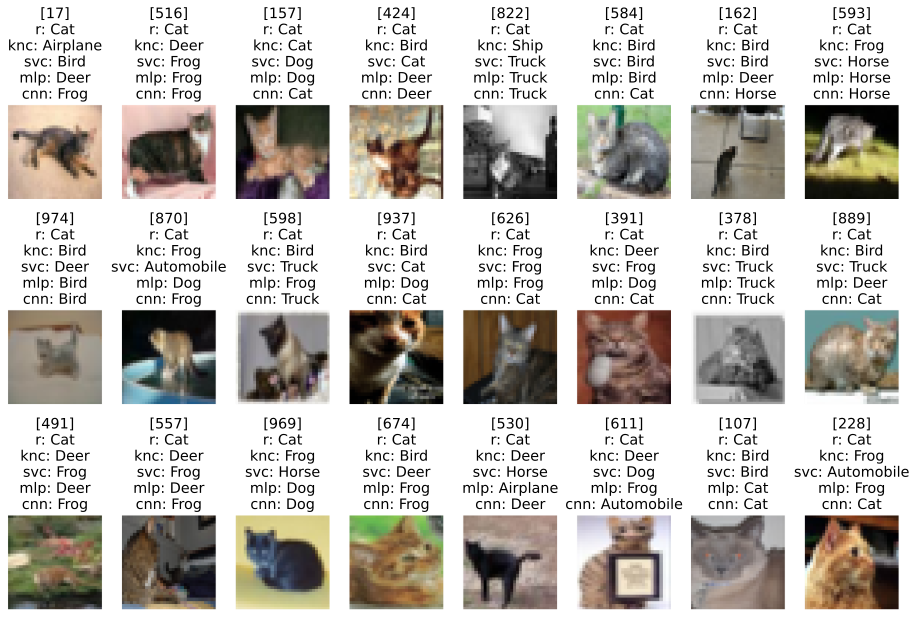

In [150]:
cols = 8
rows = 3
num = cols * rows

fig = plt.figure(figsize=(8,3))
for i in range(num):
    ax = fig.add_subplot(rows, cols, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_test[:]==id_class["Cat"])[0]
    features_idx = x_test[idx,::]
    y_real = y_test[idx]
    pred_knc = y_pred_knc[idx]
    pred_svc = y_pred_svc[idx]
    pred_mlp = y_pred_mlp[idx]
    pred_cnn = y_pred_cnn[idx]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(f"""[{img_num}]
r: {class_names[y_real[img_num]]}
knc: {class_names[pred_knc[img_num]]}
svc: {class_names[pred_svc[img_num]]}
mlp: {class_names[pred_mlp[img_num]]}
cnn: {class_names[pred_cnn[img_num]]}""")
    plt.imshow(im)


fig.set_size_inches(2 * cols, 3.5 * rows)
plt.autoscale()
plt.show()